In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine, euclidean

In [3]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189.052


In [4]:
data.shape

(26229, 22)

In [5]:
features = ['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo','valence','duration_s']                 

X = data[features]

In [52]:
#Normalizing the features
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

print(X_scaled)

X_scaled[0]

[[0.76093591 0.9159853  0.91808981 ... 0.52270434 0.50967257 0.37125397]
 [0.73855544 0.81496762 0.86916162 ... 0.69929364 0.41752422 0.30867441]
 [0.68667345 0.93098792 0.90136831 ... 0.6185671  0.51790845 0.33595298]
 ...
 [0.53814852 0.82096867 0.87062842 ... 0.43995964 0.53453475 0.40114439]
 [0.63682604 0.8879804  0.90285607 ... 0.31079717 0.5346141  0.70732761]
 [0.61342828 0.8839797  0.87750141 ... 0.09021191 0.53451387 0.64907261]]


array([0.76093591, 0.9159853 , 0.91808981, 0.06350763, 0.10261569,
       0.        , 0.06556225, 0.52270434, 0.50967257, 0.37125397])

In [53]:
df = pd.DataFrame(X_scaled,columns = X.columns)

df.head()

# sns.boxplot(data=df[features], orient="h")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
0,0.760936,0.915985,0.918090,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0.738555,0.814968,0.869162,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,0.686673,0.930988,0.901368,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,0.730417,0.929988,0.894118,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,0.661241,0.832971,0.875385,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


In [54]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = df[outliers].index
num_outlier = outliers.sum()

num_outlier,outliers_indices

(10869,
 Index([    8,    20,    21,    43,    44,    45,    60,    66,    67,    82,
        ...
        26207, 26209, 26211, 26213, 26214, 26216, 26220, 26223, 26227, 26228],
       dtype='int64', length=10869))

In [55]:
data2 = data.copy()

In [56]:
for feature in features:
    Q1 = data2[feature].quantile(0.25)
    Q3 = data2[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data2[feature] = data2[feature].clip(lower_bound, upper_bound)

data2

,track_id,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.06530,0.5180,122.036,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.35700,0.6930,99.972,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.11000,0.6130,124.008,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.20400,0.2770,121.956,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.08330,0.7250,123.976,189.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26224,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.06680,0.2100,128.170,204.375
26225,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.37500,0.4000,128.041,353.120
26226,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.15000,0.4360,127.989,210.112
26227,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,-3.361,0.1090,0.007920,0.018750,0.34300,0.3080,128.008,354.472


In [57]:
Q1 = data2[features].quantile(0.25)
Q3 = data2[features].quantile(0.75)

IQR = Q3 - Q1

outliers = ((data2[features] < (Q1 - 1.5 * IQR)) | (data2[features] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = data2[outliers].index
num_outlier = outliers.sum()

num_outlier,outliers_indices

(0, Index([], dtype='int64'))

In [37]:
X2 = data2[features]
X2_scaled = scaler.fit_transform(X2)

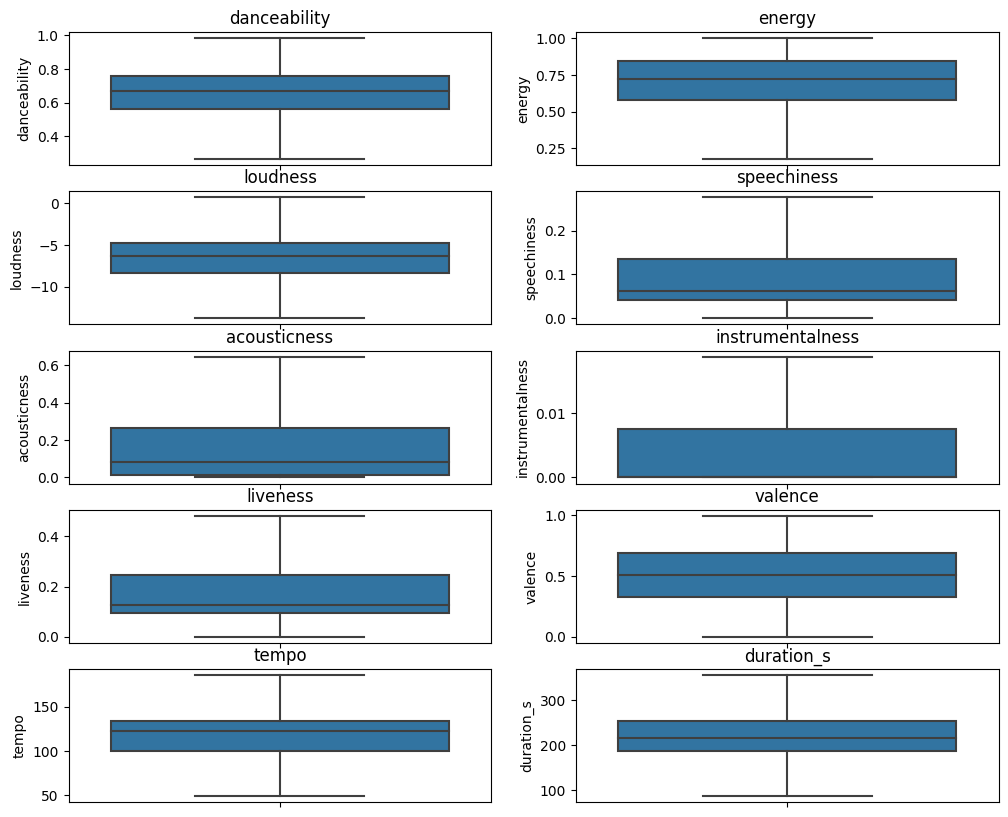

In [58]:
# Visualizing outliners by using box plots
plt.figure(figsize=(12,10))

for i,feature in enumerate(features,1):
    plt.subplot(5,2,i)
    sns.boxplot(y=data2[feature])
    plt.title(feature)

plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

#Encode categorical variables
label_encoder = LabelEncoder()
data['playlist_genre'] = label_encoder.fit_transform(data['playlist_genre'])

data.head()


,track_id,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,dance pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,dance pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,dance pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,2,dance pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189.052


In [6]:
#Prepare the data
X = data[features]
y = data['track_popularity']

#Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Create a new classifier object c
decision_tree = DecisionTreeClassifier()

#Train the model
decision_tree.fit(X_train, y_train)

#Make predictions on the test set
y_predict = decision_tree.predict(X_test)

print("Report", classification_report(y_test, y_predict))



Report               precision    recall  f1-score   support

           0       0.54      0.53      0.53       914
           1       0.27      0.29      0.28       760
           2       0.30      0.29      0.30       983
           3       0.30      0.31      0.31       816
           4       0.48      0.48      0.48      1037
           5       0.48      0.46      0.47       736

    accuracy                           0.40      5246
   macro avg       0.40      0.39      0.39      5246
weighted avg       0.40      0.40      0.40      5246



In [9]:
from sklearn.model_selection import GridSearchCV

#Define the parameter
param_grid = {
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search = GridSearchCV(estimator=decision_tree,param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

grid_search.fit(X_train,y_train)
print("Best parameters: ", grid_search.best_params_)  #Print out the best parameters found by the grid search
print("Highest F1 Score: ", grid_search.best_score_)     #Print out the highest f1 score achieved by the model with these parameters



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[C

In [10]:
best_params = grid_search.best_params_

#Train a decision tree classifier with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train,y_train)

y_pred_2 = best_decision_tree.predict(X_test)

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       914
           1       0.37      0.33      0.35       760
           2       0.34      0.37      0.36       983
           3       0.38      0.33      0.36       816
           4       0.53      0.60      0.56      1037
           5       0.53      0.51      0.52       736

    accuracy                           0.47      5246
   macro avg       0.46      0.46      0.46      5246
weighted avg       0.46      0.47      0.46      5246

